# Observations on some polynomials connected to the magnitude of an odd ball

## 1. Positivity

In [12]:
%%HTML
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.



In [10]:
%%HTML
<style>div.text_cell_render {color: #000000; font-size: 150%; font-family: Palatino, Serif; line-height: 120%;}</style>

We will let $n$ denote an *odd* integer throughout and define $p$ by $n=2p+1$.  

Let $(\chi_i)_{i=0}^\infty$ denote the sequence of reverse Bessel polynomials. 

In [2]:
S.<R> = PolynomialRing(ZZ)

def chi(j,r):
    if j == 0:
        return 1
    return sum([factorial(s-1)*r**(2*j-s)/
                (2^(s-j)*factorial(s-j)*factorial(2*j-s-1)) 
                for s in range(j, 2*j)])

table_rows = []
for i in range(8):
    table_rows.append([i, chi(i, R)])
table(table_rows,
       header_row=["$i$","Reverse Bessel polynomial $\chi_{i}(R)$"])

,Reverse Bessel polynomial
,
,
,
,
,
,
,
,


I have proved (?!) the following formula for $|B_R^n|$, the magnitude of the $n$-dimensional ball of radius $R$.

**Theorem.**
$$
\left|B^n_R\right| 
=\frac{\det\left[\chi_{i+j+2}(R)\right]^{p}_{i,j=0}}
{n!\,R\det\left[\chi_{i+j}(R)\right]^{p}_{i,j=0}}
$$

Here are the first few values.

In [3]:
def Hankel_det(p, offset=0):
    M = [[chi(i+j+offset, R) for i in range(p+1)] for j in range(p+1)]
    return matrix(S, M).det()

table_rows = []
for p in range(0, 4):
    numerator = Hankel_det(p, 2)
    denominator = Hankel_det(p)*R

    table_rows.append((2*p+1,
                       1/factorial(2*p+1)*SR(numerator/denominator)))
table(table_rows,
       header_row=["$n$",r"Magnitude $\left|B_R^n \right|$"])

,Magnitude
,
,
,
,


The first thing to note is that both numerator and denominator seem to have positive coefficients.

**Conjecture 0.**
The magnitude function $|B^n_R|$ is a ratio of polynomials with postitive coefficients.

Mokshay Madiman and Mark Meckes conjecture that a Brunn-Minkowski inequality holds for the magnitude.  This leads to the following.

**Conjecture 1.** [Madiman-Meckes] The magnitude function $|B^n_R|$ is log-convex as a function of $R$, i.e.
$$
\tfrac{d^2}{dR^2}(\log|B_R^n|)\le 0.
$$

We can do some calculations.

In [4]:
table_rows = []
for p in range(0, 3):
    mag = Hankel_det(p, 2)/(Hankel_det(p)*R*factorial(2*p+1))
    table_rows.append((2*p+1,  (diff(log(mag), R, 2).factor())))
table(table_rows,
       header_row=["$n$","Second logarithmic derivative of magnitude "
                        r"$\frac{d^2}{dR^2}\biggl(\log\bigl|B_R^n\bigr|\biggr)$"])

,Second logarithmic derivative of magnitude
,
,
,


It seems, and this is true at least up to $n=39$, that the second logarithmic derivative is $-1$ times a ratio of coefficientwise positive polynomials.  If this were true then we could prove a special case of the Brunn-Minkowski inequality for magnitude.  (See right at the bottom for a much stronger possibility for the coefficients.)

The denominators are recognisable from the magnitude.  This leads us to ask whay $\frac{d}{dR}\log\bigl|B^n _R\bigr|$ is.  But we know the answer to that: $\frac{d}{dR}\bigl|B^n _R\bigr|/\bigl|B^n _R\bigr|$.  So let's examine the ordinary derivative of the magnitude.

In [5]:
table_rows = []
for p in range(0, 5):
    mag = Hankel_det(p, 2)/(Hankel_det(p)*R*factorial(2*p+1))
    derivative = diff(mag, R)
    num = SR(derivative.numerator().factor())
    denom = SR(derivative.denominator().factor())
    table_rows.append((2*p+1, num/denom))
table(table_rows,
       header_row=["$n$",r"First derivative of mangitude $\frac{d}{dR}\bigl|B_R^n\bigr|$"])

,First derivative of mangitude
,
,
,
,
,



Clearly the denominators are recognisable in terms of the denominators of the magnitude.  The numerators are also recognisable if you know your Hankel determinants!

Let's calculate $\det[\chi_{i+j+1}(R)]^{p}_{i,j=0}$.

In [6]:
table_rows = []
for p in range(0, 5):
    table_rows.append((2*p+1, Hankel_det(p, 1).factor()))
(table(table_rows,
       header_row=["n","First offset Hankel determinant " 
                   r"$\det\left[\chi_{i+j+1}(R)\right]^{p}_{i,j=0}$"]))

n,First offset Hankel determinant
,
,
,
,
,


These seem to be related to the numerators in the derivative of the magnitue.  Let's write 
$$
H(p, \alpha) = \det\left[\chi_{i+j+\alpha}(R)\right]^{p}_{i,j=0}
$$
for the shifted Hankel determinant.  A bit more precise computation leads to the following conjecture.

**Conjecture 2.**  The derivative of the magnitude can be written in the following way.
$$\frac{d}{dR}\left(\frac{H(p, 2)}{(2p+1)!\;R\; H(p,0)}\right)= \frac{H(p,1)^2}{(2p)!\;R^2\;H(p,0)^2}$$

We can quickly check that Conjecture 2 holds up to, say, $n=29$ ($p=14$).

In [7]:
print "Here are ordered pairs (n v) with v being the truth value of Conjecture 2 for n:"
for p in range(15):
    A = Hankel_det(p, 2)
    B = R*Hankel_det(p)
    conjecture = diff(A, R)*B - diff(B,R)*A == (2*p+1)*Hankel_det(p,1)^2
    if p%5 == 0:
        print
    print 2*p+1, conjecture, "  \t",

Here are ordered pairs (n v) with v being the truth value of Conjecture 2 for n:

1 True   	3 True   	5 True   	7 True   	9 True   	
11 True   	13 True   	15 True   	17 True   	19 True   	
21 True   	23 True   	25 True   	27 True   	29 True   	

Conjecture 2 would imply that
$$
\tfrac{d}{dR}(\log|B_R^n|)=
\frac{n\;H(p,1)^2}{R\;H(p,0)\;H(p,1)}
$$

I have not spotted any conjecture for the second logarithmic derivative as a ratio of products of Hankel determinants.

It is definitely looking like the Hankel derivatives are all coefficientwise positive polynomials.  Whilst this would prove Conjecture 0, it wouldn't prove Conjecture 1, but it would certainly provide evidence in that direction.

After I saw some related ideas on Hankel determinants in notes from a talk of his, I asked Alan Sokal if he knew anything that could be applied for the reverse Beseel polynomials.  Using unpublished methods of his, he has so far proved the following.

**Theorem.** [Sokal]
Every minor of the infinite matrix $\left[ \chi_{i+j+1}\right]_{i,j=0}^\infty$ is a coefficientwise positive polynomial.

In particular this shows that $H(p, 1)$ and $H(p,2)$ are coefficientwise positive, but it does not show that $H(p, 0)$ is.

Let's now consider a stronger property that Alan Sokal has seen in other polynomial sequences.

## 2. Log-concavity

All of this talk of positive coefficients is fine, but it looks like there is more going on: coefficients of all the polynomials that appear above are log-concave!  This means that for the polynomial $\sum_i a_i R^i$ we have
$$
\log (a_i) \ge \tfrac{\log (a_{i-1}) +\log (a_{i+1})}{2}.
$$
Here we are implicitly assuming that the coefficients are non-negative, and we interpret $\log(0)$ sensibly.  Provided that the terms are positive this is the same as $a_i^2\ge a_{i-1}a_{i+1}$, of course.

**Aside.** *I learnt about log-concave polynomials from a talk in March by Martin Lotz.  He was talking about intrinsic volumes and how they form a log-concave sequence.  As we thought the coefficients in the magnitude had something to do with intrinsic volumes I decided to check the coefficients and was very surprised when all the polynomials I looked at were indeed log-concave.*

Log-concavity seems to be a common, yet somewhat mysterious, property of polynomials which crops up in algebra and combinatorics.  Intriguingly the Alexandrov-Fenchel inequality seems to be a useful tool in proving log-concavity.

We can show that we have log-concavity for the Hankel determinants with small $p$.  We can do this below for $H(19, 0)$, $H(19, 1)$ and $H(19, 2)$ and for the numerator and denominator of $-\tfrac{d^2}{dR^2}(\log|B^{39}_R|)$, and we can illustrate that by plotting the graphs of the log of coefficients.

log of coeffs of <script type="math/tex">H(19, 0)</script>

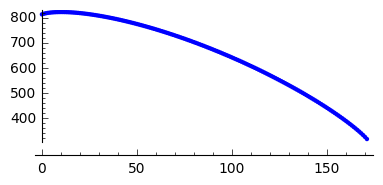

Concave!

log of coeffs of <script type="math/tex">H(19, 1)</script>

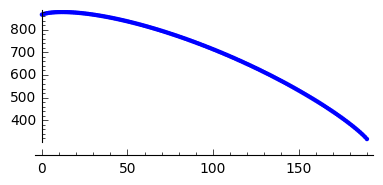

Concave!

log of coeffs of <script type="math/tex">H(19, 2)</script>

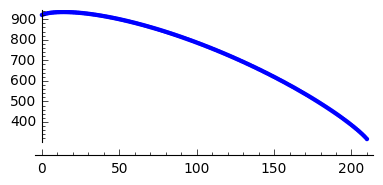

Concave!

log of coeffs of numerator of <script type="math/tex">-\tfrac{d^2}{dR^2}\log|B^{39}|</script>

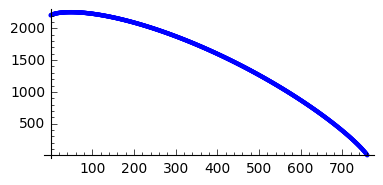

Concave!

log of coeffs of denominator of <script type="math/tex">-\frac{d^2}{dR^2}\log|B^{39}|</script>

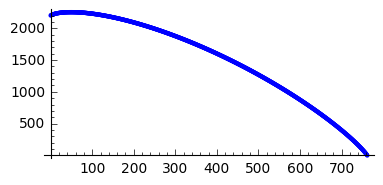

Concave!

In [8]:
p = 19

def log_concave(f, pic=True):
    log_coeffs = map(lambda x: (log(x)).n(),f.coefficients(R))
    if pic:
        show(list_plot(log_coeffs), figsize=[4,2])
    concave =[]
    for i in range(1, len(log_coeffs)-1):
        concave.append(2*log_coeffs[i] - log_coeffs[i-1] - log_coeffs[i+1])
    #print html("min of $\log(a_i^2/a_{i+1}a_{i-1})$ = %s"% min(concave))
    if min(concave) >= 0:
        print html("Concave!")

pretty_print(html("log of coeffs of $H(%s, 0)$"%p))
H_0 = Hankel_det(p, 0)
log_concave(H_0)

pretty_print(html("log of coeffs of $H(%s, 1)$"%p))
H_1 = Hankel_det(p, 1)
log_concave(H_1)

pretty_print(html("log of coeffs of $H(%s, 2)$"%p))
H_2 = Hankel_det(p, 2)
log_concave(H_2)

A = H_2
B = R * H_0
second_log_deriv = ((A * diff(A, R, 2) * B^2 - A^2 * B * diff(B, R, 2) 
                     - diff(A, R)^2 * B^2 + A^2*diff(B, R)^2)/(A^2*B^2))
# = diff(log(H_2/(H_0*R*factorial(2*p+1))), R, 2) 
pretty_print(html(r"log of coeffs of numerator of $-\tfrac{d^2}{dR^2}\log|B^{%s}|$"%(2*p+1)))
log_concave(-second_log_deriv.numerator())
pretty_print(html(r"log of coeffs of denominator of $-\frac{d^2}{dR^2}\log|B^{%s}|$"%(2*p+1)))
log_concave(second_log_deriv.denominator())

They are all log-concave polynomials, so that's quite promising.  And leads to the next conjecture.

**Conjecture 3.**  The magnitude $|B^n_R|$, its derivative and minus its second logarithmic derivative all have numerator and denominator with log-concave coefficients.

Bearing in mind the theorem of Alan Sokal about the positivity of minors of the Hankel matrix, and the fact that there are other polynomial sequences which *appear* to have all Hankel minors being log-concave polynomials, we are led to the following question.

**Question.** Is every minor of the infinite matrix $\left[ \chi_{i+j}\right]_{i,j=0}^\infty$ a log-concave polynomial?

Note that the $(1\times 1)$-minor case of this is asking if each reverse Bessel polynomial is log-concave.  That is not hard to prove.

We can try to pick some random minors of a large Hankel matrix.

<h3>Testing the log-concavity of 4 random 5 x 5 minors of a 150 x 150 Hankel matrix</h4>

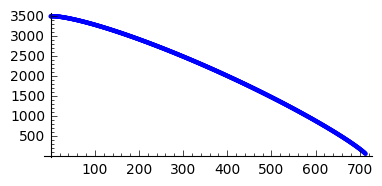

Concave!

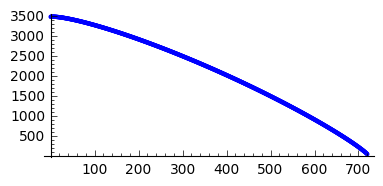

Concave!

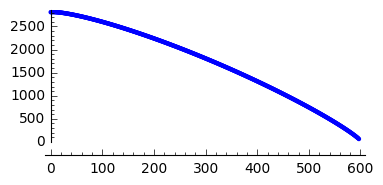

Concave!

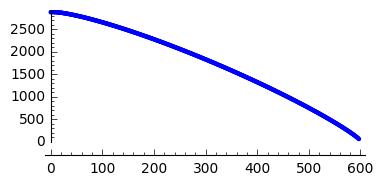

Concave!

In [9]:
hankel_size = 150
minor_size = 5
number_of_trials = 4
print(html("<h3>Testing the log-concavity of %s random %s x %s minors of a %s x %s Hankel matrix</h4>"%
           (number_of_trials, minor_size, minor_size, hankel_size, hankel_size)))
SS = Subsets(range(hankel_size), minor_size)
for trial in range(number_of_trials):
    I = list(SS.random_element())
    J = list(SS.random_element())
    I.sort()
    J.sort()
    P = matrix(S,[[chi(i+j, R) for i in I] for j in J]).det()
    # print P
    log_concave(P, pic=True)

These are all log-concave...